In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Section 3:Classification/K Nearest Neighbor(KNN)/Social_Network_Ads.csv")
print(dataset.head())
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1:].values
print(X)
print(y)

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25

# Splitting dataset to Training and test set

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Featuring scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training K-NN model on training data

In [5]:
# KNN calculates euclidean distance between new data with trained data to classify new incoming data
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors-No of neighbors to consider(default:5),weights 
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
# ravel - returns array with same memory reference as original array shape (n_samples,). Changing value with refect changes in original array
# flatten - returns copy of original array(shape (n_samples,1)). Changing value won't affect original array
classifier.fit(X_train,np.ravel(y_train))

KNeighborsClassifier()

# Predicting new result

In [6]:
print(classifier.predict(sc.transform([[30,87000]])))
print(classifier.predict(sc.transform([[36,144000]])))

[0]
[1]


# Predicting test set

In [7]:
y_pred=classifier.predict(X_test)

# Confusion Matrix

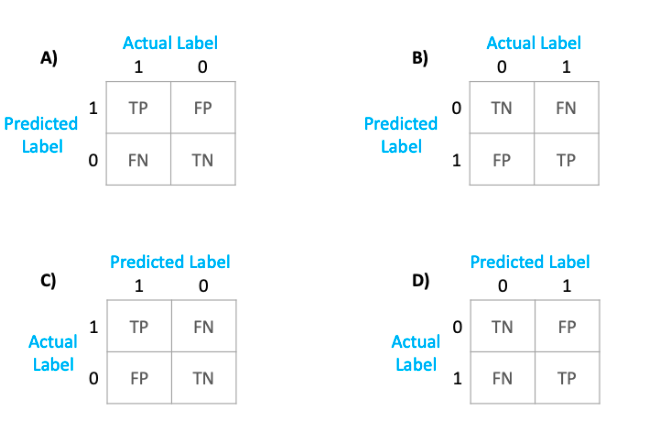

In [8]:
from sklearn.metrics import confusion_matrix
print('First row is 1(Positive) & second row is 0(Negative) in this case :\n',confusion_matrix(y_test, y_pred, labels=[1,0]))
print('First row is 0(Positive) & second row is 1(Negative) in this case :\n',confusion_matrix(y_test, y_pred, labels=[0,1]))
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('cm :\n',cm)

cm1 = confusion_matrix(y_test, y_pred)
print('cm1 :\n', cm1)

tp, fn, fp, tn = cm1.reshape(-1);
print('tp : ', tp, ' fn : ', fn, " fp : ", fp, " fn : ", fn)

First row is 1(Positive) & second row is 0(Negative) in this case :
 [[29  3]
 [ 4 64]]
First row is 0(Positive) & second row is 1(Negative) in this case :
 [[64  4]
 [ 3 29]]
cm :
 [[29  3]
 [ 4 64]]
cm1 :
 [[64  4]
 [ 3 29]]
tp :  64  fn :  4  fp :  3  fn :  4


# Accuracy Matrix

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model.

Accuracy = TP+TN/TP+FP+FN+TN

In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

cal_acc_score = (tp+tn)/(tp+fn+fp+tn)
print('cal_acc_score : ', cal_acc_score)

accuracy_score :  0.93
cal_acc_score :  0.93


# Precision Calculation

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.
For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.


In [11]:
precision_0 = tp/(tp+fp)
precision_1 = tn/(tn+fn)
print('Precision 0 : ', precision_0 )
print('Precision 1 : ', precision_1)

Precision 0 :  0.8787878787878788
Precision 1 :  0.9552238805970149


# Recall Calculation

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

In [12]:
recall_0 = tp/(tp+fn)
recall_1 = tn/(fp+tn)
print('Recall 0 : ', tp/(tp+fn))
print('Recall 1 : ', tn/(fp+tn))

Recall 0 :  0.90625
Recall 1 :  0.9411764705882353


# F-1 Score Calculation

In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value. F1 Score is needed when you want to seek a balance between Precision and Recall. Right…so what is the difference between F1 Score and Accuracy then? We have previously seen that accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

Takes into account how the data is distributed. Useful when you have data with imbalance classes.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [13]:
f1_score_0 = 2*((precision_0*recall_0)/(precision_0+recall_0))
f1_score_1 = 2*((precision_1*recall_1)/(precision_1+recall_1))
print("f1_score_0 : ", f1_score_0)
print("f1_score_1 : ", f1_score_1)

f1_score_0 :  0.8923076923076922
f1_score_1 :  0.9481481481481482


# Using classification_report to calculate everthing

In [14]:
from sklearn.metrics import classification_report
cp = classification_report(y_test, y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## Without swapping labels - Easy to follow

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cm.reshape(-1)
print(cm)
print("tn = {}, fp = {}, fn = {}, tp = {}".format(tn, fp, fn, tp))
total = tn+fp+fn+tp
print(total)
accuracy = (tp+tn)/total
print('accuracy : ', accuracy)
precision_0 = tn/(tn+fn) #negative
print('precision_0 : ',precision_0)
precision_1 = tp/(tp+fp) #positive
print('precision_1 : ',precision_1)
recall_0 = tn/(tn+fp) #negative
print('recall_0 : ',recall_0)
recall_1 = tp/(tp+fn) #positive
print('recall_1 : ',recall_1)

f1_score_0 = 2*precision_0*precision_0/(precision_0+precision_0)
f1_score_1 = 2*precision_1*precision_1/(precision_1+precision_1)
print('f1_score_0 : ', f1_score_0)
print('f1_score_1 : ', f1_score_1)

[[64  4]
 [ 3 29]]
tn = 64, fp = 4, fn = 3, tp = 29
100
accuracy :  0.93
precision_0 :  0.9552238805970149
precision_1 :  0.8787878787878788
recall_0 :  0.9411764705882353
recall_1 :  0.90625
f1_score_0 :  0.9552238805970149
f1_score_1 :  0.8787878787878788
